In [1]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("ChIPseeker")
#biocLite("TxDb.Mmusculus.UCSC.mm9.knownGene")

library(ChIPseeker)
library(TxDb.Mmusculus.UCSC.mm9.knownGene)
txdb <- TxDb.Mmusculus.UCSC.mm9.knownGene


ChIPseeker v1.10.3  For help: https://guangchuangyu.github.io/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383
Loading required package: GenomicFeatures
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, M

In [2]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("clusterProfiler")
library(clusterProfiler)

Loading required package: DOSE
DOSE v3.0.9  For help: https://guangchuangyu.github.io/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609

clusterProfiler v3.2.10  For help: https://guangchuangyu.github.io/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu., Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


In [4]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("ReactomePA")

In [2]:
library(yaml)
rel_path = "/home/sergio/media"
tlx_list <- yaml.load_file("tracks/TLX3_TLX3_list.yaml")
tlx_peaks <- paste(rel_path, tlx_list$peaks[1], sep = "")
tlx_peaks

[1] "/home/sergio/media/NAS4/PFlab/TLX3_project/ChiP-Seq/TLX3/051peak_merge/TLX3_TLX3_summits.bed"

In [3]:
peak <- readPeakFile(tlx_peaks)

In [8]:
methods(class=class(peak))

  [1] aggregate           anyNA               <=                 
  [4] <                   ==                  >=                 
  [7] >                   !=                  append             
 [10] as.character        as.complex          as.data.frame      
 [13] as.env              as.factor           as.integer         
 [16] as.list             as.logical          as.matrix          
 [19] as.numeric          as.raw              by                 
 [22] c                   coerce              coerce<-           
 [25] countOverlaps       coverage            disjoin            
 [28] disjointBins        distance            distanceToNearest  
 [31] duplicated          elementMetadata<-   elementMetadata    
 [34] end<-               end                 eval               
 [37] expand.grid         expand              extractROWS        
 [40] extractUpstreamSeqs findOverlaps        flank              
 [43] follow              gaps                [                  
 [46] $<- 

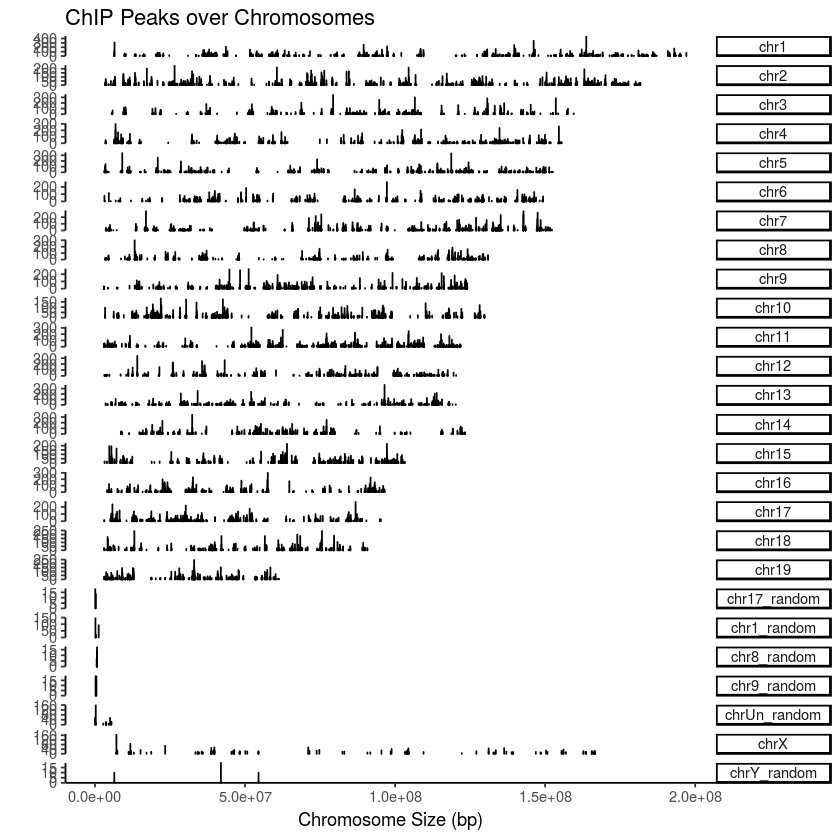

In [9]:
covplot(peak, weightCol="V5")

In [10]:
#covplot(peak, weightCol="V5", chrs=c("chr17", "chr18"), xlim=c(4.5e7, 5e7))

# Profile of ChIP peaks binding to TSS regions

In [11]:
promoter <- getPromoters(TxDb=txdb, upstream=3000, downstream=3000, by = "transcript")
tagMatrix <- getTagMatrix(peak, windows=promoter)
tss <- getBioRegion(TxDb=txdb, upstream=1000, downstream=1000, by="transcript")
#tagMatrix <- getTagMatrix(peak, windows=tss)

In [15]:
head(tss)

GRanges object with 6 ranges and 0 metadata columns:
      seqnames                 ranges strand
         <Rle>              <IRanges>  <Rle>
  [1]     chr9 [ 20871369,  20873369]      -
  [2]     chr7 [ 92111519,  92113519]      -
  [3]    chr10 [ 77173202,  77175202]      +
  [4]     chr4 [143751554, 143753554]      -
  [5]     chr4 [134305022, 134307022]      -
  [6]     chr4 [134322919, 134324919]      -
  -------
  seqinfo: 35 sequences from an unspecified genome; no seqlengths

## Heatmap of ChIP binding to TSS regions

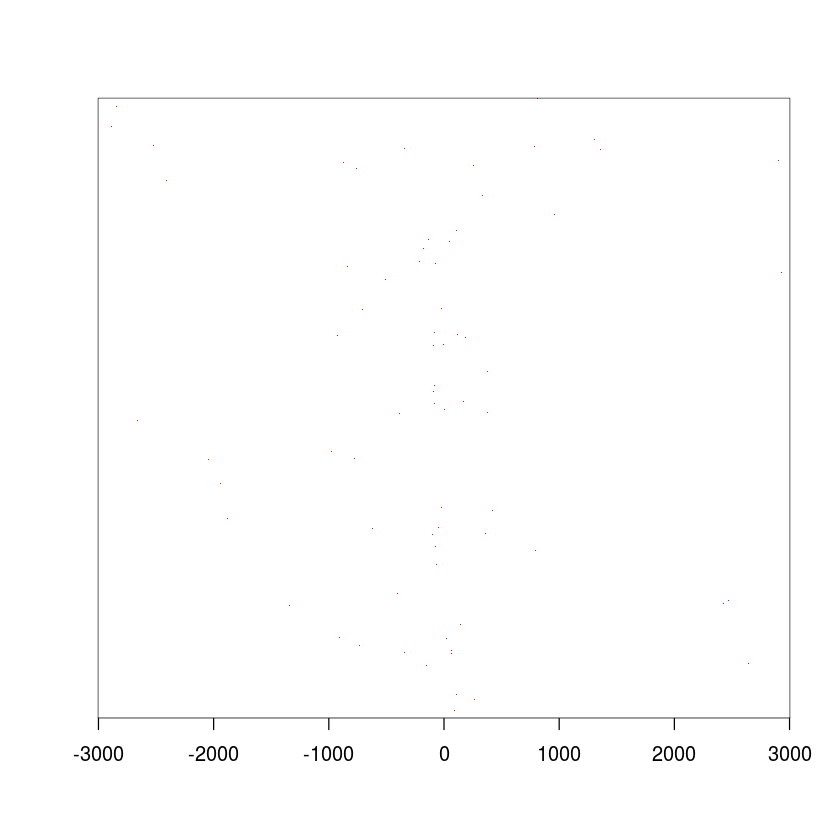

In [16]:
tagHeatmap(tagMatrix, xlim=c(-3000, 3000), color="red")

In [ ]:
# Average Profile of ChIP peaks binding to TSS region
#plotAvgProf(tagMatrix, xlim=c(-3000, 3000), conf = 0.95,
            #xlab="Genomic Region (5'->3')", ylab = "Read Count Frequency")

# Peak Annotation

In [21]:
columns(org.Mm.eg.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MGI"          "ONTOLOGY"    
[16] "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"         "PROSITE"     
[21] "REFSEQ"       "SYMBOL"       "UNIGENE"      "UNIPROT"

In [4]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("org.Mm.eg.db")
peakAnno <- annotatePeak(tlx_peaks, tssRegion=c(-3000, 3000), 
                         TxDb=txdb, annoDb="org.Mm.eg.db")

>> loading peak file...				 2017-04-12 17:42:26 
>> preparing features information...		 2017-04-12 17:42:26 
>> identifying nearest features...		 2017-04-12 17:42:27 
>> calculating distance from peak to TSS...	 2017-04-12 17:42:28 
>> assigning genomic annotation...		 2017-04-12 17:42:28 
>> adding gene annotation...			 2017-04-12 17:42:45 


Loading required package: org.Mm.eg.db

'select()' returned many:many mapping between keys and columns


>> assigning chromosome lengths			 2017-04-12 17:42:47 
>> done...					 2017-04-12 17:42:47 


## Visualize Genomic Annotation

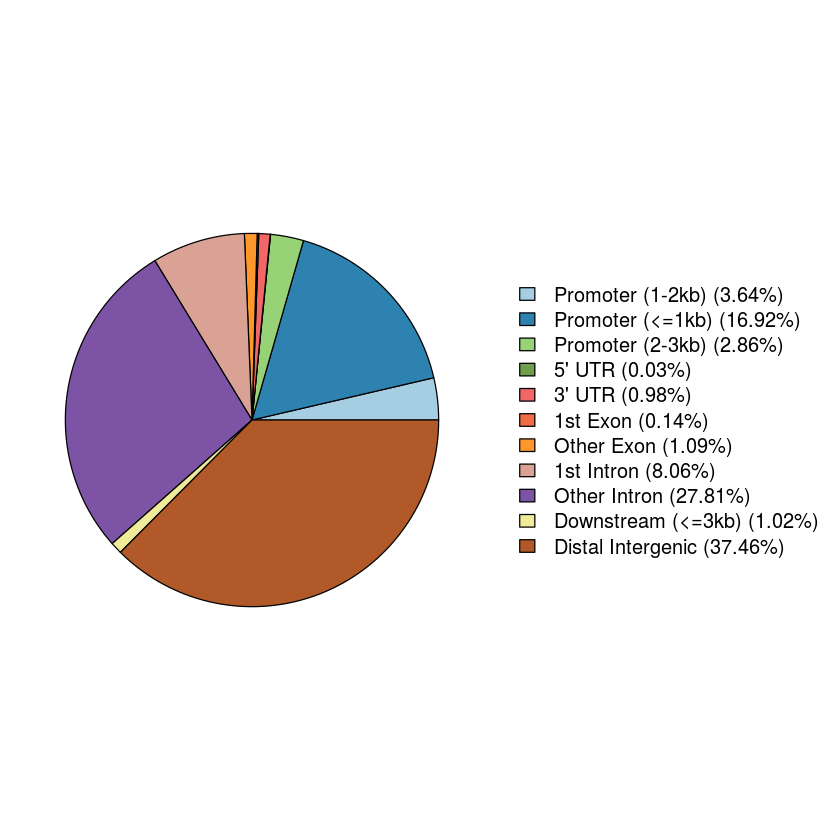

In [22]:
# Genomic Annotation by pieplot
plotAnnoPie(peakAnno)

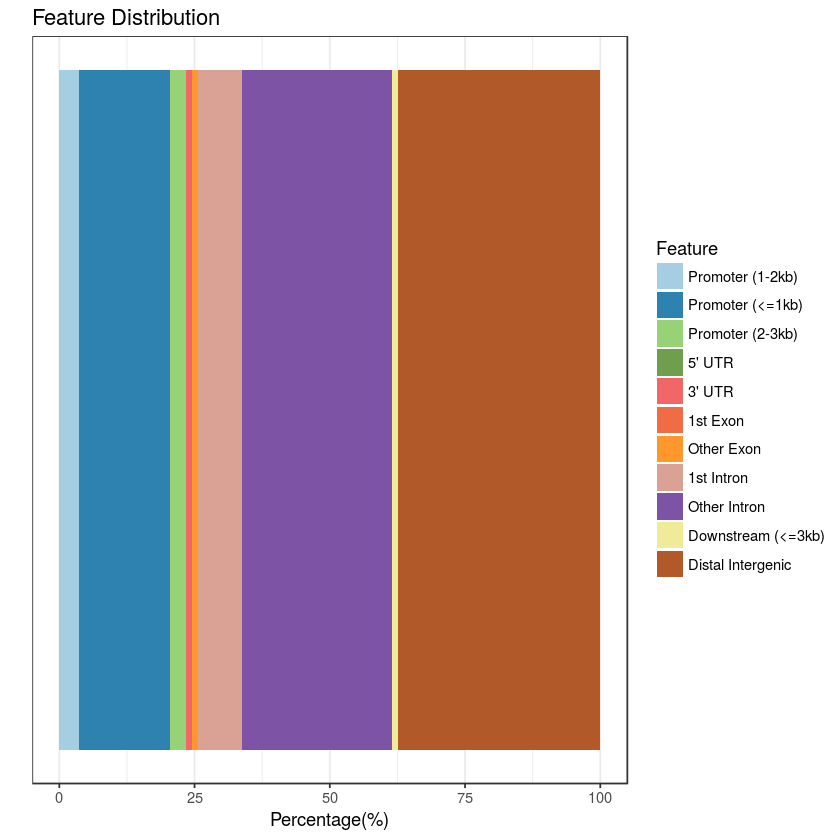

In [14]:
# Genomic Annotation by barplot
plotAnnoBar(peakAnno)

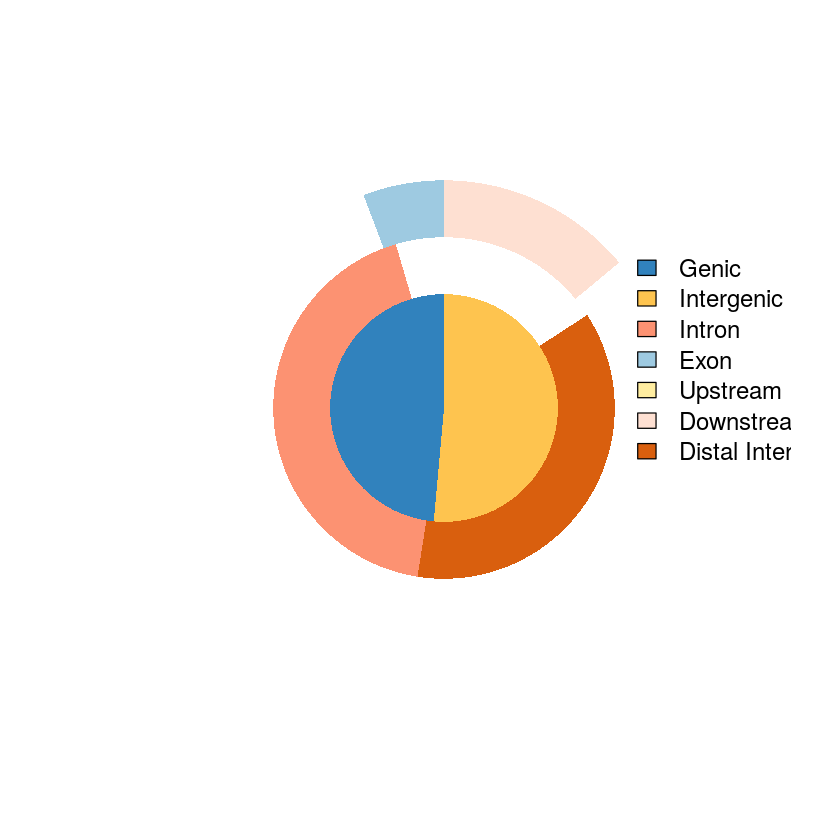

In [15]:
# Genomic Annotation by vennpie
vennpie(peakAnno)

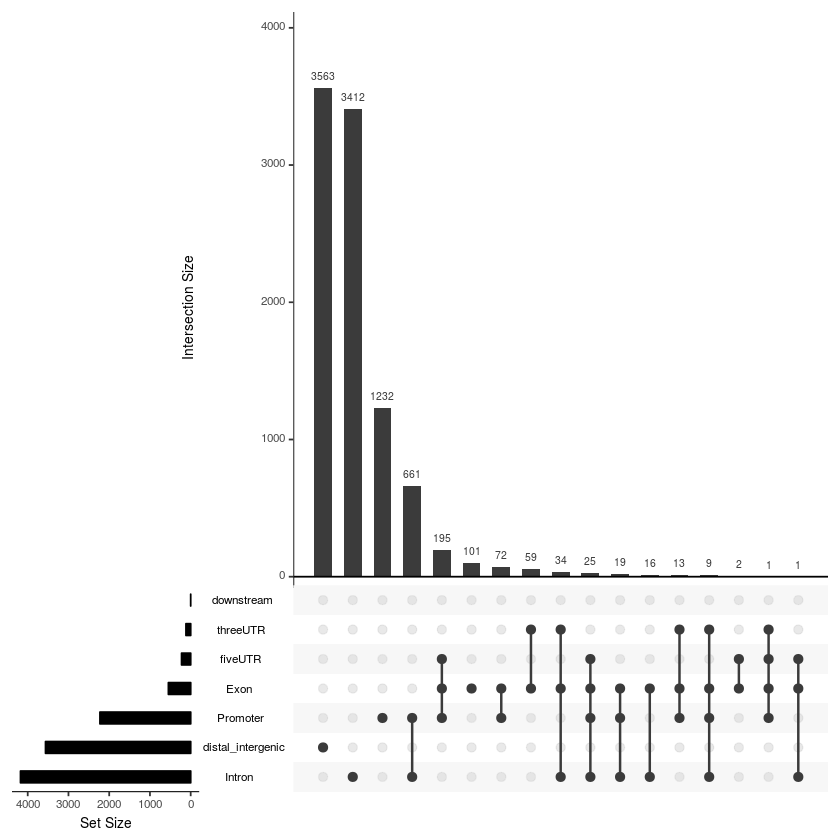

In [16]:
upsetplot(peakAnno)

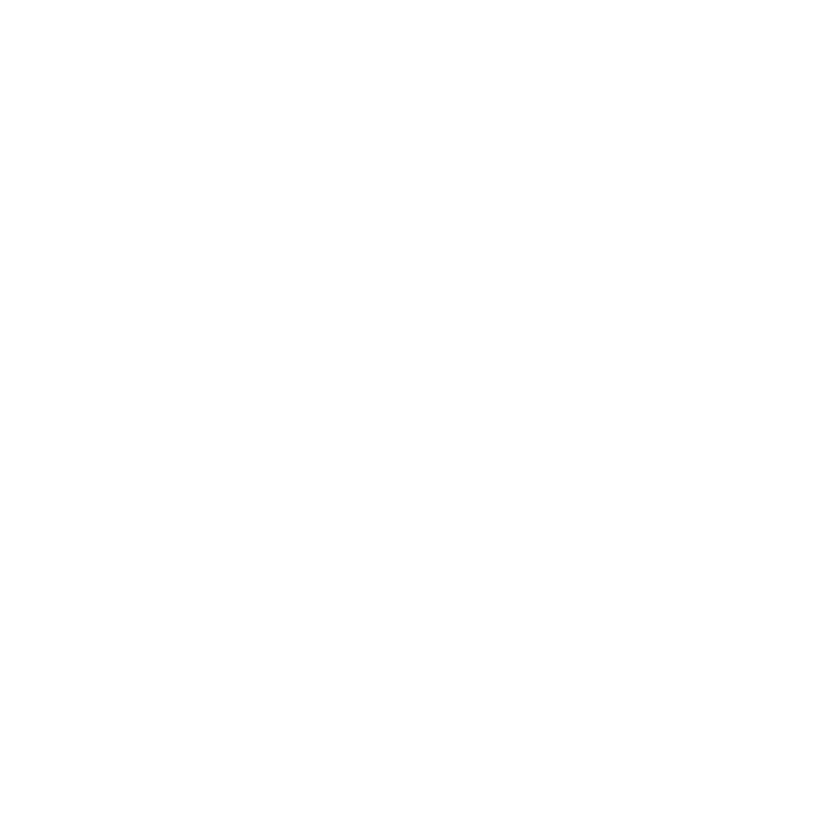

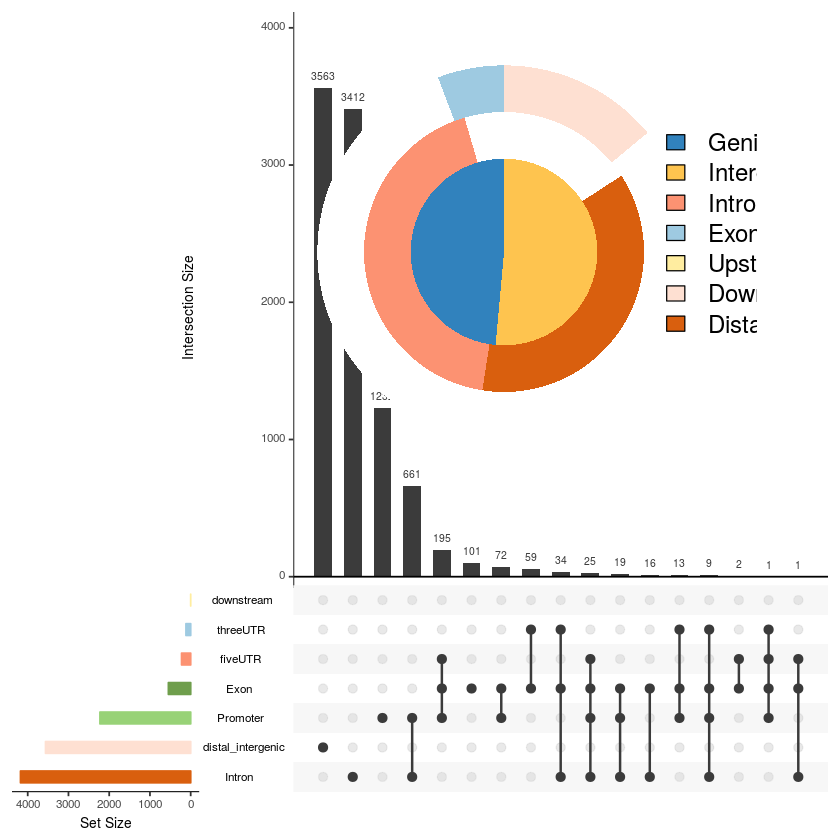

In [17]:
# We can combine vennpie with upsetplot by setting vennpie = TRUE.
upsetplot(peakAnno, vennpie=TRUE)

## Visualize distribution of TF-binding loci relative to TSS

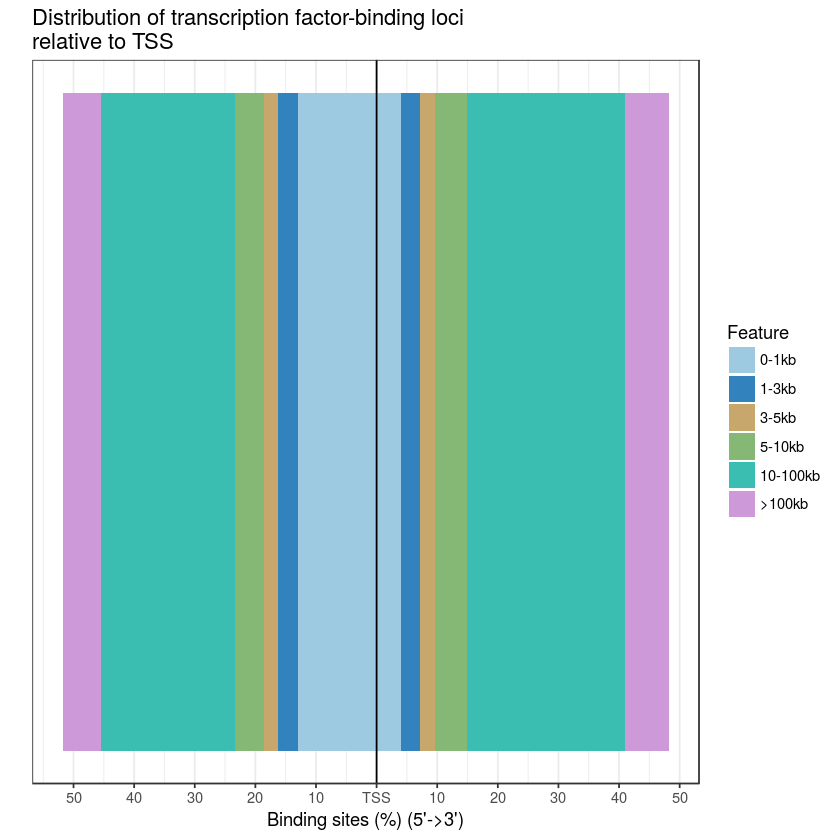

In [18]:
# The distance from the peak (binding site) to the TSS of the nearest 
# gene is calculated by annotatePeak and reported in the output. 
# We provide plotDistToTSS to calculate the percentage of binding sites 
# upstream and downstream from the TSS of the nearest genes, and 
# visualize the distribution.
plotDistToTSS(peakAnno, 
              title="Distribution of transcription factor-binding loci\nrelative to TSS")

# Functional enrichment analysis

Once we have obtained the annotated nearest genes, we can perform functional enrichment analysis to identify predominant biological themes among these genes by incorporating biological knowledge provided by biological ontologies. For instance, Gene Ontology (GO)7 annotates genes to biological processes, molecular functions, and cellular components in a directed acyclic graph structure, Kyoto Encyclopedia of Genes and Genomes (KEGG)8 annotates genes to pathways, Disease Ontology (DO)9 annotates genes with human disease association, and Reactome10 annotates gene to pathways and reactions.

ChIPseeker also provides a function, **seq2gene**, for linking genomc regions to genes in a many-to-many mapping. It consider host gene (exon/intron), promoter region and flanking gene from intergenic region that may under control via cis-regulation. This function is designed to link both coding and non-coding genomic regions to coding genes and facilitate functional analysis.

Enrichment analysis is a widely used approach to identify biological themes. I have developed several Bioconductor packages for investigating whether the number of selected genes associated with a particular biological term is larger than expected, including DOSE2 for Disease Ontology, ReactomePA for reactome pathway, clusterProfiler4 for Gene Ontology and KEGG enrichment analysis.

In [ ]:
library(ReactomePA)

#pathway1 <- enrichPathway(as.data.frame(peakAnno)$geneId)
#head(pathway1, 2)

In [22]:
gene <- seq2gene(peak, tssRegion = c(-1000, 1000), flankDistance = 3000, TxDb=txdb)
pathway2 <- enrichPathway(gene, organism = "mouse") 
#head(pathway2, 2)

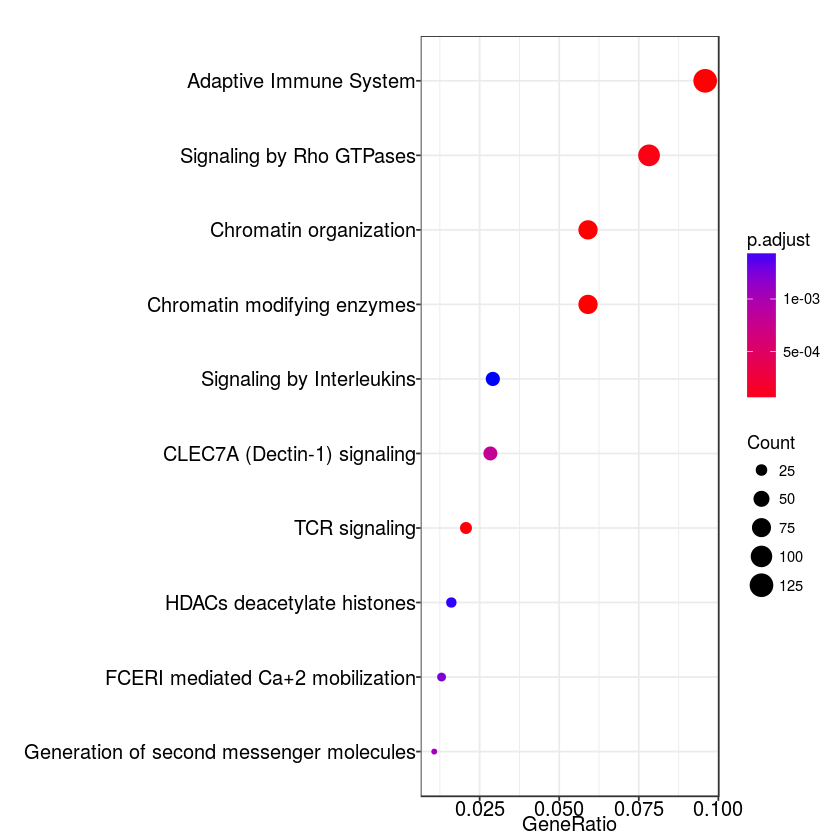

In [21]:
dotplot(pathway2)

In [ ]:
#source("https://bioconductor.org/biocLite.R")
#biocLite("BiocUpgrade")

[1] "TxDb.Mmusculus.UCSC.mm9.knownGene"